In [1]:
from pneumonia_dnn.dataset import update_dataset_from_metadata, create_dataset, DatasetClassifier
from pneumonia_dnn.project import create_project
import shutil
from pneumonia_dnn.project import apply_augmentations
from pneumonia_dnn.models.cnn import run_cnn
import matplotlib.pyplot as plt
from keras import backend
from pneumonia_dnn.models.vit import run_vit
from pneumonia_dnn.models.vgg16 import run_vgg16
from pneumonia_dnn.models.vitb16 import run_vitb16

def plot_history(history, item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

epochs = 50


2024-04-14 02:41:11.385471: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-14 02:41:11.434207: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 02:41:11.434241: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 02:41:11.435536: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 02:41:11.443229: I tensorflow/core/platform/cpu_feature_guar

In [2]:
shutil.rmtree("datasets/pneumonia_binary_classification", ignore_errors=True)

create_dataset("pneumonia_binary_classification", "Chest X-Rays used for binary classification of pneumonia")

# Add data from Coronahack-chest-xray dataset
# source: https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset
update_dataset_from_metadata(
                        "pneumonia_binary_classification",
                        "praveengovi/coronahack-chest-xraydataset",
                        "https://www.kaggle.com/datasets/praveengovi/coronahack-chest-xraydataset",
                        "Chest_xray_Corona_Metadata.csv",
                        label_column="Label",
                        labels=[
                            DatasetClassifier("pneumonia", "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset", "Pnemonia", True),
                            DatasetClassifier("nonpneumonia",  "Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset", "Normal", True)
                        ],
                        image_column="X_ray_image_name",
                        folder_column="Dataset_type",
                        folder_to_lower=True,
                        download_path="downloads",
                        dataset_path="datasets" )

# Add data from the Sampl NIH Dataset
# source: https://www.kaggle.com/datasets/nih-chest-xrays/sample
update_dataset_from_metadata(
                        "pneumonia_binary_classification",
                        "sample",
                        "https://www.kaggle.com/datasets/nih-chest-xrays/sample",
                        "sample_labels.csv",
                        label_column="Finding Labels",
                        labels=[
                            DatasetClassifier("pneumonia", "sample/images", "Pneumonia", True),
                            DatasetClassifier("nonpneumonia",  "sample/images", "Pneumonia", False)
                        ],
                        image_column="Image Index",
                        folder_column=None,
                        folder_to_lower=True,
                        download_path="downloads",
                        dataset_path="datasets" )

/home/ubuntu/workspace/Pneumonia-DNN/pneumonia_dnn/dataset.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[image_column] = (
/home/ubuntu/workspace/Pneumonia-DNN/pneumonia_dnn/dataset.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df[image_column] = (


In [3]:
shutil.rmtree("projects/first_project", ignore_errors=True)
create_project("first_project", "pneumonia_binary_classification", 224, 224, 3, None, 0.7, 8600, None)

Processing test for label nonpneumonia: 100%|██████████| 1290/1290 [00:00<00:00, 2545.49it/s]


In [4]:
apply_augmentations("first_project", 0.2, 0.2, True, True, 0.02)

Found 6020 files belonging to 2 classes.


2024-04-11 02:25:00.527061: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-11 02:25:00.581729: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-11 02:25:00.584705: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 2580 files belonging to 2 classes.
Epoch 1/50


2024-04-11 02:25:05.028609: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-11 02:25:07.021604: I external/local_xla/xla/service/service.cc:168] XLA service 0x7effbe83dfe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-11 02:25:07.021638: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-04-11 02:25:07.027075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712802307.096930    6505 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


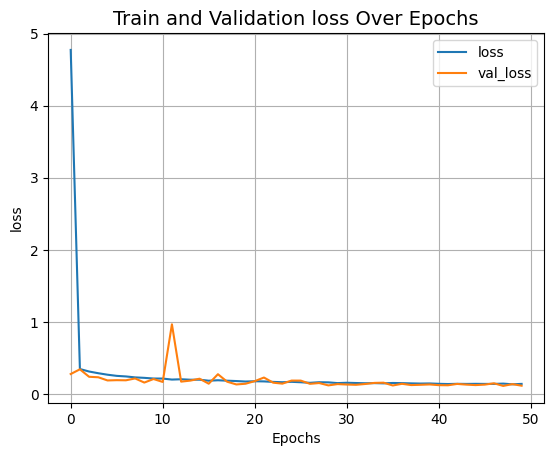

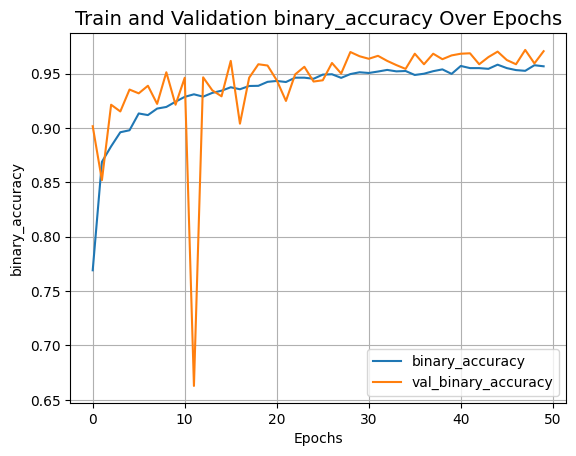

In [5]:
cnn_history = run_cnn("first_project", epochs=epochs)
plot_history(cnn_history, "loss")
plot_history(cnn_history, "binary_accuracy")
backend.clear_session()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


2024-04-11 02:40:21.689521: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Found 6020 files belonging to 2 classes.
Found 2580 files belonging to 2 classes.
Epoch 1/50
189/189 [==============================] - 61s 254ms/step - loss: 4.9933 - binary_accuracy: 0.5467 - val_loss: 0.6513 - val_binary_accuracy: 0.6039
Epoch 2/50
189/189 [==============================] - 48s 253ms/step - loss: 0.6810 - binary_accuracy: 0.5791 - val_loss: 0.6697 - val_binary_accuracy: 0.5752
Epoch 3/50
189/189 [==============================] - 48s 252ms/step - loss: 0.6835 - binary_accuracy: 0.5653 - val_loss: 0.6334 - val_binary_accuracy: 0.6205
Epoch 4/50
189/189 [==============================] - 48s 252ms/step - loss: 0.6464 - binary_accuracy: 0.6058 - val_loss: 0.5902 - val_binary_accuracy: 0.7109
Epoch 5/50
189/189 [==============================] - 48s 252ms/step - loss: 0.5965 - binary_accuracy: 0.6751 - val_loss: 0.4735 - val_binary_accuracy: 0.8337
Epoch 6/50
189/189 [==============================] - 48s 252ms/step - loss: 0.5996 - binary_accuracy: 0.6872 - val_loss: 0

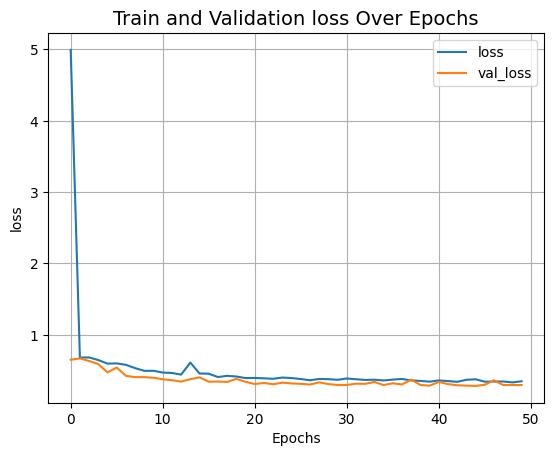

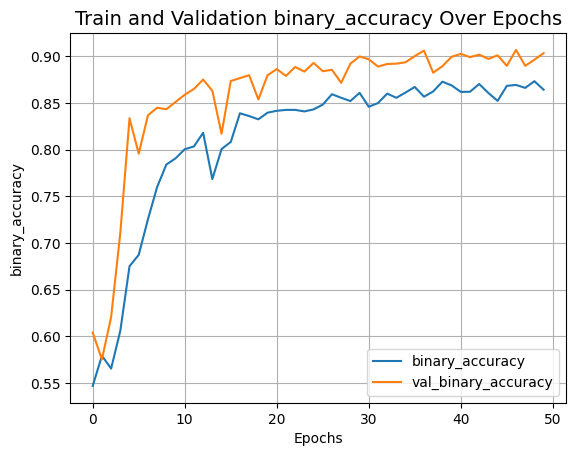

In [6]:
vit_history = run_vit("first_project", epochs=epochs)

plot_history(vit_history, "loss")
plot_history(vit_history, "binary_accuracy")
backend.clear_session()

Found 6020 files belonging to 2 classes.
Found 2580 files belonging to 2 classes.
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


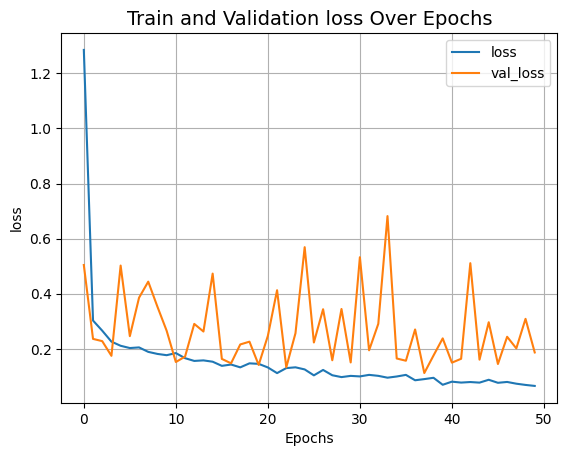

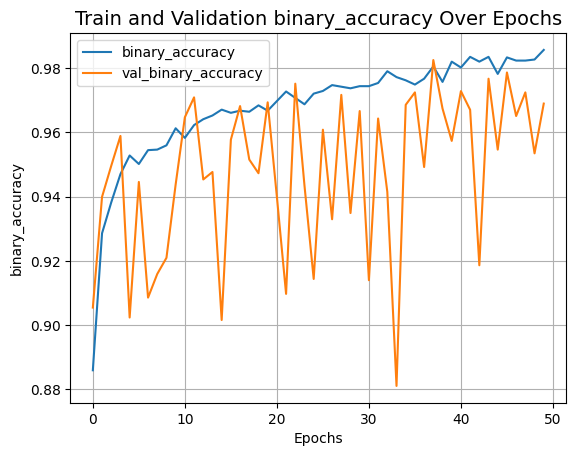

In [7]:
vgg16_history = run_vgg16("first_project", epochs=epochs)

plot_history(vgg16_history, "loss")
plot_history(vgg16_history, "binary_accuracy")
backend.clear_session()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


2024-04-13 02:26:34.901255: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 02:26:35.351874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 02:26:35.356626: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 6020 files belonging to 2 classes.


2024-04-13 02:26:35.649924: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 02:26:35.653103: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 02:26:35.655737: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 2580 files belonging to 2 classes.
347502902/347502902 [==============================] - 32s 0us/step


/opt/tensorflow/lib/python3.10/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


Epoch 1/50


2024-04-13 02:27:27.049898: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-13 02:27:30.032141: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0fe40036c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-13 02:27:30.032176: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-04-13 02:27:30.061338: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712975250.190837    5787 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


189/189 [==============================] - 68s 280ms/step - loss: 0.6297 - binary_accuracy: 0.6437 - val_loss: 0.5441 - val_binary_accuracy: 0.7473
Epoch 2/50
189/189 [==============================] - 51s 268ms/step - loss: 0.5377 - binary_accuracy: 0.7395 - val_loss: 0.5020 - val_binary_accuracy: 0.7535
Epoch 3/50
189/189 [==============================] - 51s 268ms/step - loss: 0.5130 - binary_accuracy: 0.7505 - val_loss: 0.4503 - val_binary_accuracy: 0.8151
Epoch 4/50
189/189 [==============================] - 51s 269ms/step - loss: 0.4993 - binary_accuracy: 0.7626 - val_loss: 0.4732 - val_binary_accuracy: 0.7643
Epoch 5/50
189/189 [==============================] - 51s 269ms/step - loss: 0.4837 - binary_accuracy: 0.7726 - val_loss: 0.4110 - val_binary_accuracy: 0.8395
Epoch 6/50
189/189 [==============================] - 51s 269ms/step - loss: 0.4748 - binary_accuracy: 0.7849 - val_loss: 0.4002 - val_binary_accuracy: 0.8450
Epoch 7/50
189/189 [==============================] - 52s

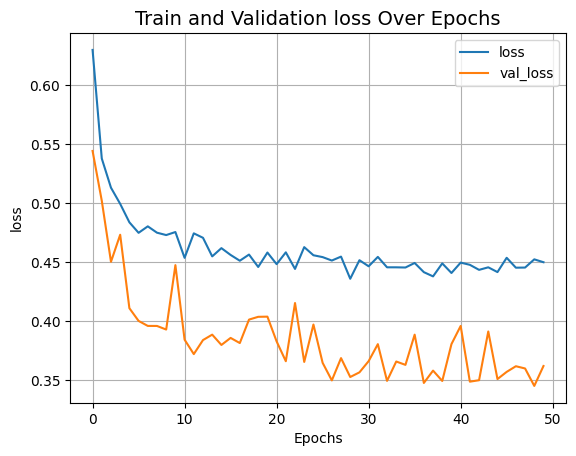

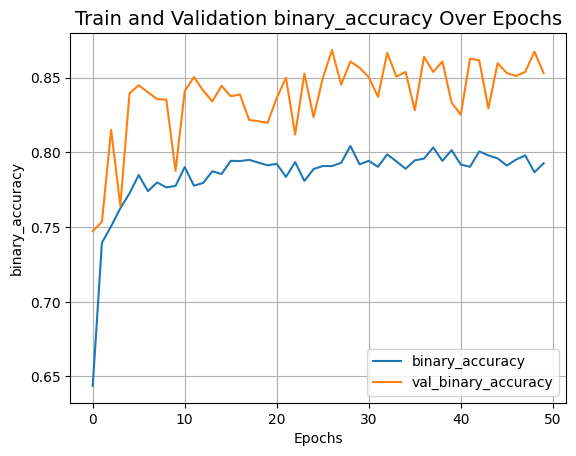

In [3]:
vitb16_history = run_vitb16("first_project", epochs=epochs)

plot_history(vitb16_history, "loss")
plot_history(vitb16_history, "binary_accuracy")
backend.clear_session()